In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
from zipfile import ZipFile
  

with ZipFile("Datasets/im.db.zip", 'r') as zObject:
    zObject.extractall(
        path="IMDB/")

conn = sqlite3.connect("IMDB/im.db")
cur = conn.cursor()
imdb= pd.read_sql('''
    SELECT * 
    FROM persons;

''', conn)
imdb.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [6]:
pd.read_sql("""
SELECT *
  FROM movie_basics
  WHERE genres = "Drama"
 LIMIT 10
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
1,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama
2,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama
3,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama
4,tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama
5,tt0263814,On kadin,On kadin,2019,NaN,Drama
6,tt0357717,Haar Jeet,Haar Jeet,2018,NaN,Drama
7,tt0381957,Cloud Cuckoo Land,Cloud Cuckoo Land,2012,92.0,Drama
8,tt0396123,Den milde smerte,Den milde smerte,2010,280.0,Drama
9,tt0402887,Capture the Flag,Capture the Flag,2010,NaN,Drama


In [7]:
data =  """
SELECT *
FROM movie_ratings AS "mr" 
LEFT JOIN movie_basics AS "m"
    ON m.movie_ID=mr.movie_ID

"""
df = pd.read_sql(data, conn)
df.head(3)

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,tt10384606,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,tt1042974,Just Inès,Just Inès,2010,90.0,Drama


In [14]:
df.isna().sum()

movie_id              0
averagerating         0
numvotes              0
movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

**Recommendation: Runtime

Focus on either short films (movies that are 56 minutes, including the credits) or on long films (movies that are about 120 minutes) 

Reworded: When producing short films, make them about 56 minutes long, and make long movies about 120 minutes long

In [90]:
#Looking at data within the suggested time

df_new = df[(df["runtime_minutes"] >=50.0) & (df["runtime_minutes"] <=150.0)]
movie_table = df_new.dropna()
movie_table.isna().sum()

movie_id           0
averagerating      0
numvotes           0
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [8]:
df.describe()

,averagerating,numvotes,start_year,runtime_minutes
count,73856.000000,7.385600e+04,73856.000000,66236.000000
mean,6.332729,3.523662e+03,2014.276132,94.654040
std,1.474978,3.029402e+04,2.614807,208.574111
min,1.000000,5.000000e+00,2010.000000,3.000000
25%,5.500000,1.400000e+01,2012.000000,81.000000
50%,6.500000,4.900000e+01,2014.000000,91.000000
75%,7.400000,2.820000e+02,2016.000000,104.000000
max,10.000000,1.841066e+06,2019.000000,51420.000000


In [13]:
sample= df[(df["runtime_minutes"] >=0) & (df["runtime_minutes"] <=50.0)]

sample.head()

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
62,tt1409015,8.2,40,tt1409015,Greenlit,Greenlit,2010,50.0,Documentary
276,tt1758611,8.7,15,tt1758611,For the Love of Elephants,For the Love of Elephants,2010,46.0,"Biography,Documentary"
283,tt1764500,7.6,8,tt1764500,Moves,Moves,2010,46.0,"Comedy,Drama"
288,tt1772275,3.6,7,tt1772275,Ghost Stories 4,Ghost Stories 4,2010,48.0,"Documentary,Horror"
323,tt1810756,4.4,10,tt1810756,Sick and Sicker,Sick and Sicker,2010,50.0,"Documentary,News"


In [15]:
sample.describe()

,averagerating,numvotes,start_year,runtime_minutes
count,1538.000000,1538.000000,1538.000000,1538.000000
mean,7.141027,65.180104,2013.910923,42.258778
std,1.458228,720.109556,2.553627,10.722653
min,1.000000,5.000000,2010.000000,3.000000
25%,6.400000,7.000000,2012.000000,44.000000
50%,7.300000,12.000000,2014.000000,46.000000
75%,8.200000,25.000000,2016.000000,48.000000
max,10.000000,25596.000000,2019.000000,50.000000


**Supporting visualization for short film recommendation

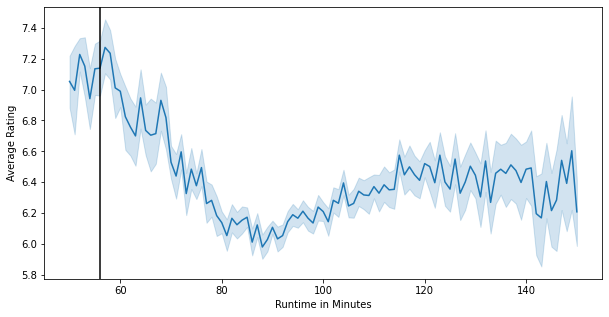

In [91]:
fig, ax = plt.subplots(figsize=(10,5))
g = sns.lineplot(data=movie_table, x=movie_table['runtime_minutes'], y=movie_table['averagerating'])
g.axvline(x = 56, color = "black")
ax.set(xlabel="Runtime in Minutes", ylabel="Average Rating");


Here, we are testing average ratings. Good ratings = good movies. The movies that have runtime less than 56 minutes have higher ratings and this is why you should make these movies.

Ho: Movies that have runtime less than 56 minutes do not have higher average rating
Ha: Movies that have runtime less than 56 minutes have higher average rating

Where average rating = population mean of 6.33
i.e Ho: MUo = 6.33
    Ha: MUo != 6.33

This is a two-tailed Z test because we know the sample size is more than 30, and we know the population standard deviation.


Feed back notes: Subsample s = movies with runtime < 56 (mean= from new dataframe for sample <56), population: all movies (mean can be found by using .describe)

Here, we are testing average ratings not runtime...good ratings = good movies. 
The movies that have runtime less than 56 minutes have higher ratings and this is why you should make these movies


In [2]:
x_bar = 7.14 #Sample mean
MU = 6.33 #Population mean
n = 1538 #Sample size
sigma = 1.47 #Population SD
alpha = 0.05 


import numpy as np
import scipy.stats as stats

In [3]:
z = (x_bar - MU)/(sigma/np.sqrt(n))
p_value = stats.norm.sf(z)
p_value

7.302241934970984e-104

**The p_value of 7.3 is greater than alpha of 0.05, this means we fail to reject the null hypothesis because we do not have enough evidence to reject the assumed hypotheisis that movies that have runtime less than 56 minutes do not have higher average rating. 


**Recommendation: Cost/Budget

Majority of movies cost between 10 million and 150 million. We recommend budgetting about 200M for your originals to standout yet be profitable  

In [94]:
movie_budget = pd.read_csv("Datasets/movie_budgets_clean.csv")
movie_budget.head(3)

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,335507625,1590837654,2351345279
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,-169536125,394000000,635063875
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-307237650,-243000000,-200237650


**First Vizualiation that shows movies what most movies cost

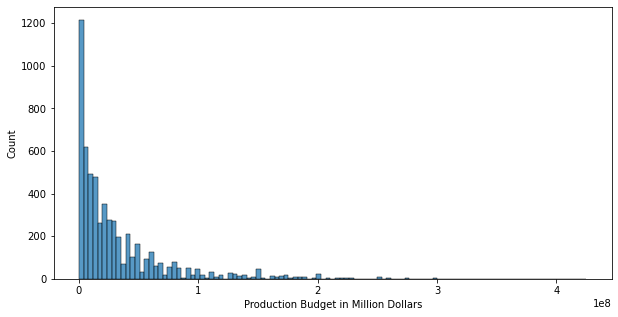

In [95]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=movie_budget, x=movie_budget["production_budget"])
ax.set(xlabel="Production Budget in Million Dollars", ylabel="Count"); 

#This shows that most movies are within the budget of 10M AND 150M 

**Now that we see how much most movies cost, we preoceed to investigate how much movies gross both domestically and internationally based on the reported budget.

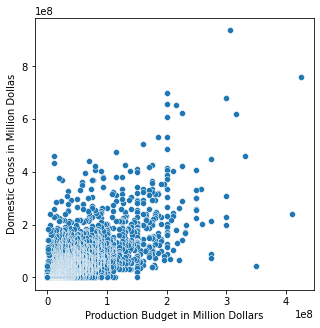

In [96]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=movie_budget, x=movie_budget["production_budget"], y=movie_budget["domestic_gross"])
ax.set(xlabel="Production Budget in Million Dollars", ylabel="Domestic Gross in Million Dollas"); 

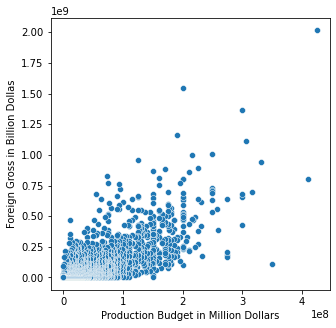

In [97]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=movie_budget, x=movie_budget["production_budget"], y=movie_budget["foreign_gross"])
ax.set(xlabel="Production Budget in Million Dollars", ylabel="Foreign Gross in Billion Dollas"); 

**As shown above, movies in the 10M - 150M range generally have a profit of about 10 - 200 million while a few in the popular budget range do well but unprecendently. 

**Holding all other factors (actors, movie quality, script quality, etc) constant, an investment of 200M is a nice spot to start as the gross for this budget is higher than the majority and competitive with movies that cost almost twice its budet  

**ASIDE: This recommendation sets the stage for the argument that movies luanched internationally do 
         better than domestic movies because the gross is already in billion here. 
         
         Now you can discuss profit info. et al